In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# The given data set has only 26 sets of x and y values sowe need more x and y values
# so I am using the the dataset : https://drive.google.com/drive/folders/1mNPvWhUMjpP5zxMV0nGzn1n3SX4c5b-C?usp=sharing
def get_data():
    x_dframe=pd.read_csv("/home/mishadey/Desktop/GRIP/CODES/TASK 1 DATA/linearX.csv")
    y_dframe=pd.read_csv("/home/mishadey/Desktop/GRIP/CODES/TASK 1 DATA/linearY.csv")
    y_dframe*=100 
    xy_dframe=pd.concat([x_dframe,y_dframe],axis=1)
    xy_dframe=xy_dframe.rename(columns={xy_dframe.columns[0]:'HOURS',xy_dframe.columns[1]:"SCORES"})
    return xy_dframe

In [3]:
xy_dframe=get_data()
xy_dframe.head(10)

,HOURS,SCORES
0,8.0,99.007
1,9.1,99.769
2,8.4,99.386
3,6.9,99.508
4,7.7,99.630
5,15.6,100.320
6,7.3,99.768
7,7.0,99.584
8,7.2,99.609
9,10.1,99.774


In [4]:
def PlotHoursVersusScores(xy_dframe):
    xy_dframe.plot(x=xy_dframe.columns[0],y=xy_dframe.columns[1],style="o")
    plt.title("HOURS V/S SCORES")
    plt.xlabel("HOURS")
    plt.ylabel("SCORES")
    plt.show()

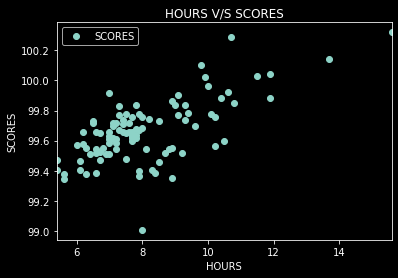

In [5]:
PlotHoursVersusScores(xy_dframe)

In [6]:
def pre_process_data(xy_dframe):
    #removing the null values and removing the duplicates
    xy_dframe=xy_dframe.dropna().drop_duplicates()
    xy_dframe=xy_dframe.values
    #train-test split to prevent the over and underfitting of model
    x_train,x_test,y_train,y_test = train_test_split(np.array(xy_dframe[:,0]),np.array(xy_dframe[:,1]),test_size=0.2,shuffle=False)
    x_train=np.reshape(x_train,(x_train.shape[0],-1))
    x_test=np.reshape(x_test,(x_test.shape[0],-1))
    y_train=np.reshape(y_train,(y_train.shape[0],-1))
    y_test=np.reshape(y_test,(y_test.shape[0],-1))
    return x_train,x_test,y_train,y_test

In [7]:
x_train,x_test,y_train,y_test=pre_process_data(xy_dframe)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(79, 1) (20, 1) (79, 1) (20, 1)


In [8]:
def Linear_Regression_Model_Train(x_train,y_train):
    model=LinearRegression()
    model.fit(x_train,y_train)
    return model

In [9]:
model=Linear_Regression_Model_Train(x_train,y_train)

In [10]:
def Linear_Regression_Model_Test(x_test):
    y_pred=model.predict(x_test)
    predicted_data = np.concatenate((x_test,y_pred),axis=1)
    return y_pred,predicted_data

In [11]:
y_pred,predicted_data = Linear_Regression_Model_Test(x_test)
print("\nTHE PREDICTED DATA IS:\n")
xy_dframe=pd.DataFrame(predicted_data)
xy_dframe=xy_dframe.rename(columns={xy_dframe.columns[0]:'HOURS',xy_dframe.columns[1]:'PREDICTED SCORES'})
xy_dframe.head(10)


THE PREDICTED DATA IS:



,HOURS,PREDICTED SCORES
0,6.2,99.507174
1,6.5,99.532179
2,7.7,99.632200
3,7.2,99.590524
4,9.3,99.765561
5,8.5,99.698880
6,7.7,99.632200
7,6.8,99.557184
8,7.8,99.640535
9,8.7,99.715550


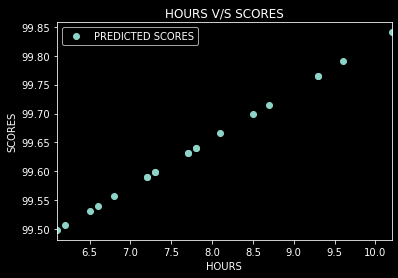

In [12]:
#ploting the predicted data
PlotHoursVersusScores(xy_dframe)

In [13]:
#Testing for the required input data : 9.25 hrs
Pred_x_val=model.predict(np.array(9.25).reshape(1,1))
print("The Prdicted Value : ",Pred_x_val[0,0]) # we are using a different dataset

The Prdicted Value :  99.76139297195249


In [14]:
def EvaluatingMetrics(x_train,x_test,y_train,y_test):
    print("\nThe mean absolute error is : ",metrics.mean_absolute_error(y_test.reshape(y_test.shape[0]),y_pred.reshape(y_pred.shape[0])))
    #print("\nThe Accuracy of model is : ",metrics.accuracy_score(y_test,y_pred))
    print("\n The model bias is :",model.intercept_)
    print("\n The model Coefficient is :",model.coef_)
    print("\n The score Coefficient is :",model.score(x_train,y_train))

In [15]:
#Metrics Evaluation
EvaluatingMetrics(x_train,x_test,y_train,y_test)


The mean absolute error is :  0.09762988817964882

 The model bias is : [98.99040007]

 The model Coefficient is : [[0.08335058]]

 The score Coefficient is : 0.4782162484693325
